In [21]:
import numpy as np
import matplotlib.pyplot as plt

quadratic_dataset_1 = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3], 
                                [7, 5], 
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4], 
                                [10, 5], 
                                [3, 1]])

In [22]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X_quadratic (3x1 numpy array): The input matrix.
    y_quadratic (1x3 numpy array): The labels vector.
    """
    X_quadratic = dataset[:,:1]
    y_quadratic = dataset[:,1]

    return X_quadratic, y_quadratic

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", y1_quadratic)


X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]


In [23]:
X1_quadratic_design = np.column_stack((X1_quadratic ** 2, X1_quadratic, np.ones(X1_quadratic.shape)))
X2_quadratic_design = np.column_stack((X2_quadratic ** 2, X2_quadratic, np.ones(X2_quadratic.shape)))
X3_quadratic_design = np.column_stack((X3_quadratic ** 2, X3_quadratic, np.ones(X3_quadratic.shape)))

print("Design Matrix for Dataset 1:\n", X1_quadratic_design)


Design Matrix for Dataset 1:
 [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]


In [24]:
weights1_quadratic = np.linalg.inv(X1_quadratic_design) @ y1_quadratic
weights2_quadratic = np.linalg.inv(X2_quadratic_design) @ y2_quadratic
weights3_quadratic = np.linalg.inv(X3_quadratic_design) @ y3_quadratic

print("Model parameters for Model 1:", weights1_quadratic)

Model parameters for Model 1: [ 1. -2.  3.]


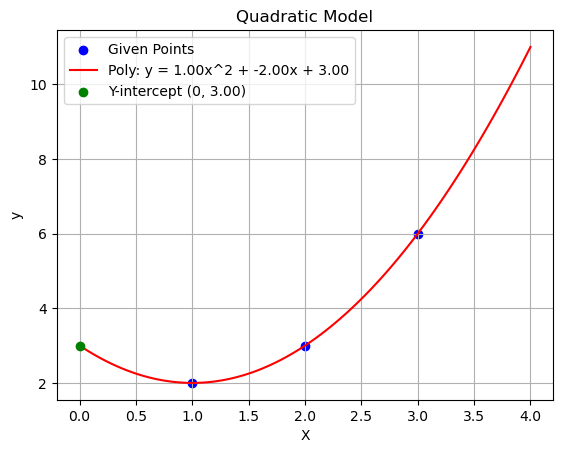

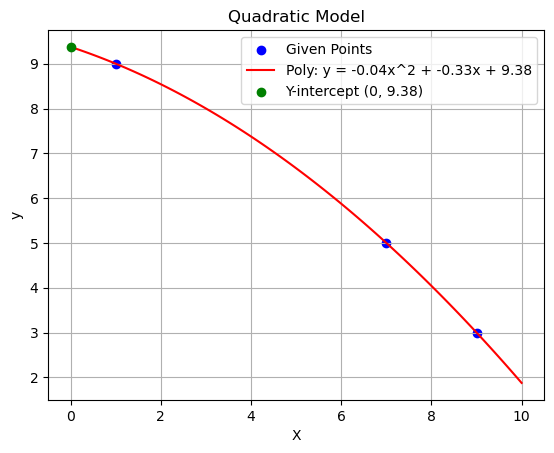

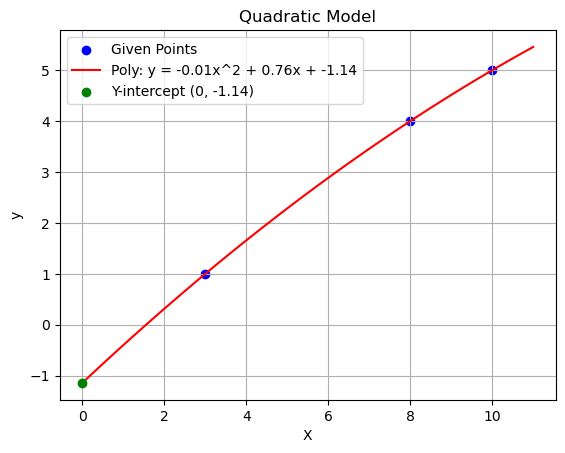

In [25]:
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, 
             y_vals, 
             color='red', 
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')
    
    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic)
plot_quadratic_model(X2_quadratic, y2_quadratic, weights2_quadratic)
plot_quadratic_model(X3_quadratic, y3_quadratic, weights3_quadratic)

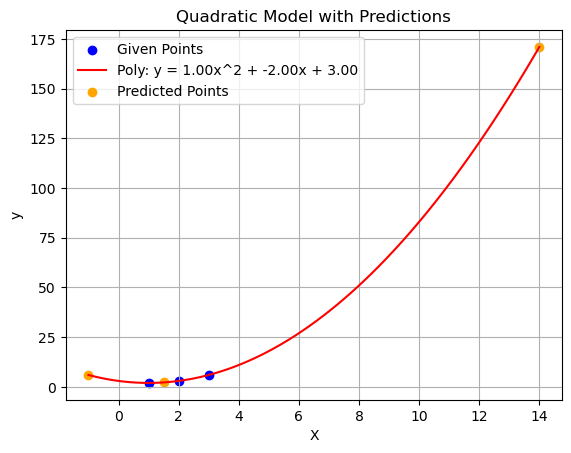

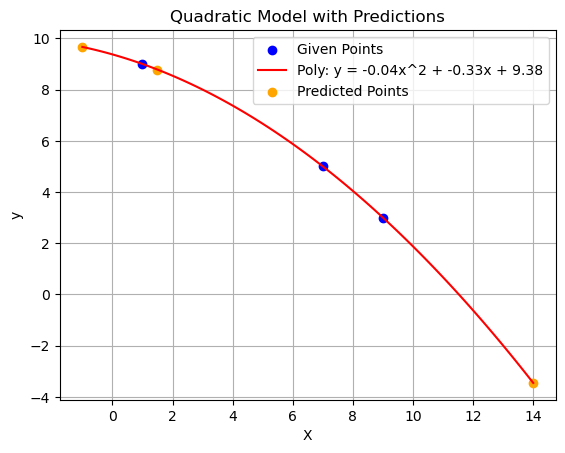

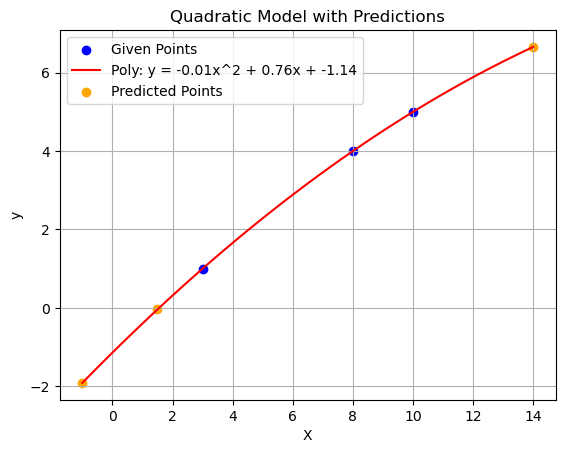

In [26]:
# New array of inputs for prediction, currently containing a single element
new_input = np.array([14, 1.5, -1])

new_input_square = new_input ** 2
ones = np.ones_like(new_input)

input_matrix = np.vstack([new_input_square, new_input, ones]).T  # Transpose to get it in the correct shape

predicted_labels1 = np.dot(input_matrix, weights1_quadratic)
predicted_labels2 = np.dot(input_matrix, weights2_quadratic)
predicted_labels3 = np.dot(input_matrix, weights3_quadratic)

def plot_quadratic_model_with_predictions(X, y, weights, new_input, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted quadratic model
    x_vals = np.linspace(min(X.min(), new_input.min()), max(X.max(), new_input.max()), 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + '
        f'{weights[2]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_input, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Quadratic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_quadratic_model_with_predictions(X1_quadratic, y1_quadratic, weights1_quadratic, new_input, predicted_labels1)
plot_quadratic_model_with_predictions(X2_quadratic, y2_quadratic, weights2_quadratic, new_input, predicted_labels2)
plot_quadratic_model_with_predictions(X3_quadratic, y3_quadratic, weights3_quadratic, new_input, predicted_labels3)

In [31]:
print("Predictions for dataset 1", np.vstack((new_input, predicted_labels1)))
print("Predictions for dataset 2", np.vstack((new_input, predicted_labels2)))
print("Predictions for dataset 3", np.vstack((new_input, predicted_labels3)))

Predictions for dataset 1 [[ 14.     1.5   -1.  ]
 [171.     2.25   6.  ]]
Predictions for dataset 2 [[14.          1.5        -1.        ]
 [-3.45833333  8.78125     9.66666667]]
Predictions for dataset 3 [[14.          1.5        -1.        ]
 [ 6.65714286 -0.03928571 -1.91428571]]


In [38]:
cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])

X_cubic, y_cubic = separate_inputs_labels(cubic_dataset)
X_cubic_design = np.column_stack((X_cubic ** 3, X_cubic ** 2, X_cubic, np.ones(X_cubic.shape)))
weights_cubic = np.linalg.inv(X_cubic_design) @ y_cubic

print(X_cubic, y_cubic)
print("Design Matrix for cubic dataset:\n", X_cubic_design)
print("Model parameters for cubic model:", weights_cubic)

[[7]
 [5]
 [8]
 [1]] [  6  24  60 120]
Design Matrix for cubic dataset:
 [[343.  49.   7.   1.]
 [125.  25.   5.   1.]
 [512.  64.   8.   1.]
 [  1.   1.   1.   1.]]
Model parameters for cubic model: [  2.64285714 -31.85714286  85.21428571  64.        ]


In [ ]:
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    
    # Plot the fitted polynomial
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))
    
    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')
    
    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()


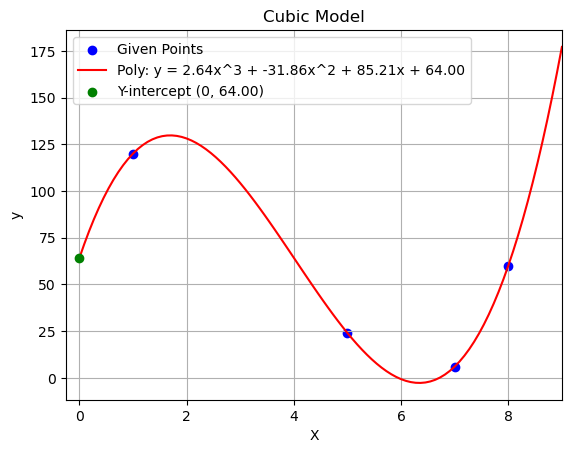

In [39]:
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    
    # Plot the fitted polynomial
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))
    
    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')
    
    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()

plot_cubic_model(X_cubic, y_cubic, weights_cubic)

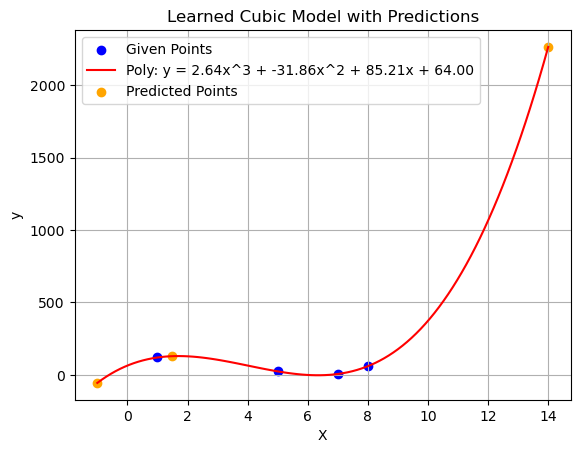

In [41]:
new_inputs = np.array([14, 1.5, -1])

new_input_cubed = new_input ** 3
new_input_square = new_input ** 2
ones = np.ones_like(new_input)

input_matrix = np.vstack([new_input_cubed, new_input_square, new_input, ones]).T  # Transpose to get it in the correct shape

predicted_labels = np.dot(input_matrix, weights_cubic)

# Function to plot data points, fitted cubic model, and predictions
def plot_cubic_model_with_predictions(X, y, weights, new_inputs, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted cubic model
    x_vals = np.linspace(min(min(X), min(new_inputs)), max(max(X), max(new_inputs)), 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_inputs, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Learned Cubic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cubic_model_with_predictions(X_cubic, y_cubic, weights_cubic, new_inputs, predicted_labels)